In [1]:
#Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the Dataset

traffic = pd.read_csv('traffic.csv')

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


In [4]:
#Performing Exploratory Data Analysis

traffic.shape

(8573, 9)

In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8573 entries, 0 to 8572
Data columns (total 9 columns):
holiday                8573 non-null object
temp                   8573 non-null float64
rain_1h                8573 non-null float64
snow_1h                8573 non-null int64
clouds_all             8573 non-null int64
weather_main           8573 non-null object
weather_description    8573 non-null object
date_time              8573 non-null object
traffic_volume         8573 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 602.9+ KB


In [ ]:
#Inference :
#There are 5 Numerical columns in the dataset out of 
#that 2 columns have decimal values (float64)

#There are 4 Categorical columns in the dataset 

In [6]:
traffic.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
#There is no null values in the dataset

In [7]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,8573.000000,8573.000000,8573.0,8573.000000,8573.000000
mean,278.976352,0.161284,0.0,52.560947,3286.762160
std,13.322459,1.439626,0.0,37.470062,2028.322769
min,244.820000,0.000000,0.0,0.000000,164.000000
25%,269.460000,0.000000,0.0,1.000000,1193.000000
50%,277.330000,0.000000,0.0,64.000000,3344.000000
75%,290.400000,0.000000,0.0,90.000000,5001.000000
max,308.240000,55.630000,0.0,100.000000,7217.000000


The mean and median of all the columns will make us to get to know about the skewness.

As we know when :
      mean > median the data is right skewed which indicates most of the values are at right side and outliers might present at the left side on the normal distribution curve.
      mean < median vice versa.

In this cases there is no big variation in the mean and median. Outliers have to be analysed.

Correlation Plot

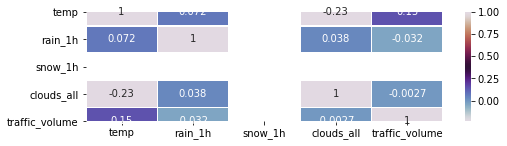

In [8]:
corr = traffic.corr()
plt.figure(figsize=(8,2))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='twilight')
plt.show()

From correlation plot we can say that temp is positively correlated with output variable traffic_volume. But they are not strongly correlated.

Visualizing the Numerical Categories

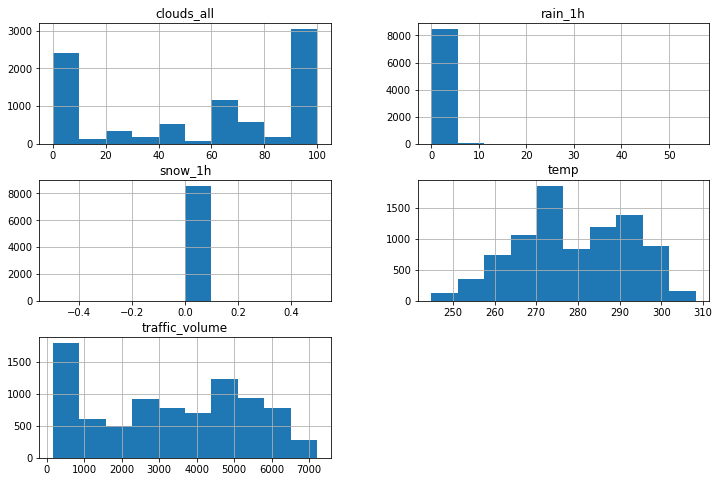

In [9]:
traffic.hist(figsize=(12,8))
plt.show()

We can see all the numerical categories and 
their values range in the histogram plot.
   
    In clouds_all column more values are in the range 90-100 and 0-10.
    
    In rain_1h and snow_1h are having low decimal values 
    and in range 0 -5 and 0.0-0.05 respectively.
    
    In temp columns the minimum value is around 220 
    and maximum value is 310 and have good distribution in 250 -310.
    
    In traffic_volume column the data is well distributed throughout the range.

Outlier Detection
Applying Scatter Plot for numerical variables

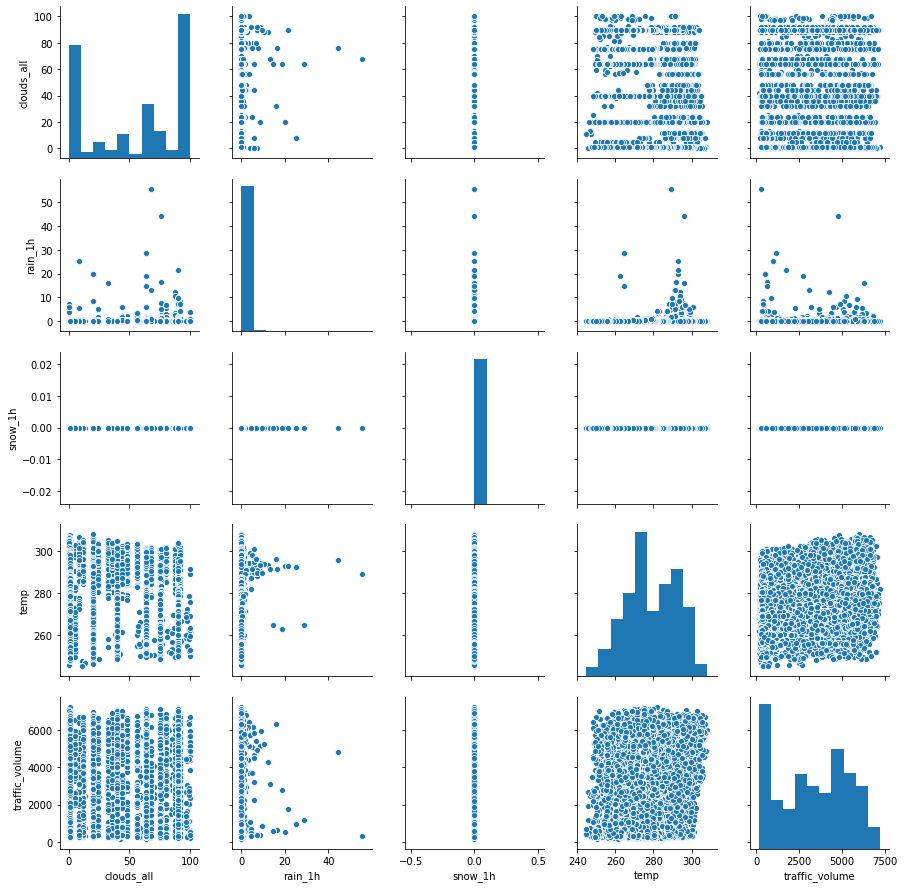

In [10]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(traffic[cols])
plt.show()

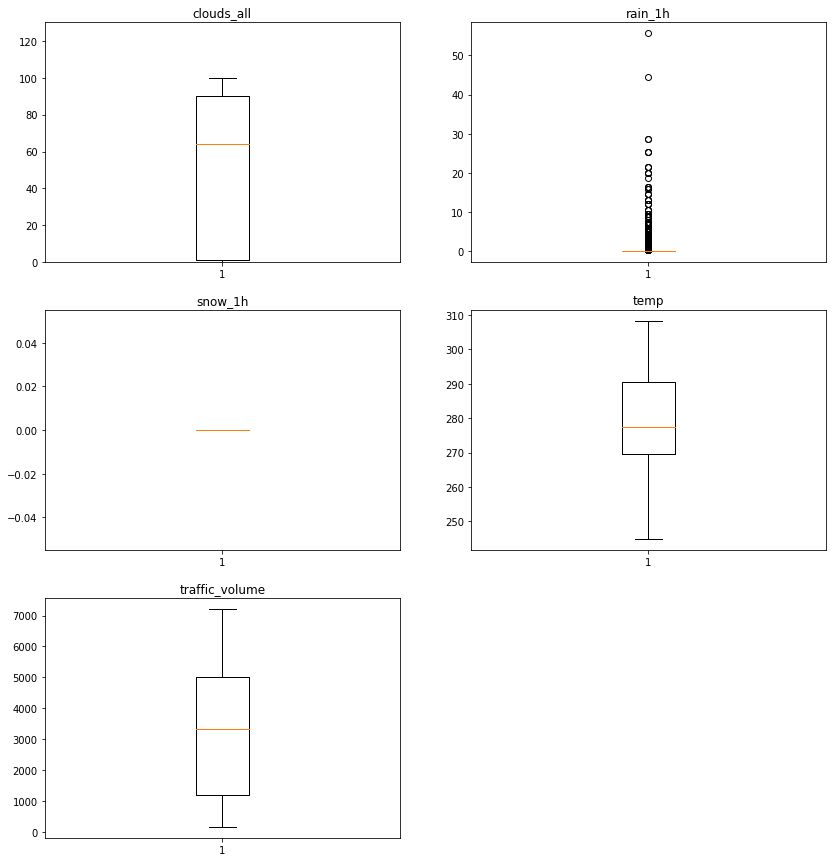

In [11]:
#Applying box plot for all the numeric values

plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(traffic['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(traffic['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(traffic['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(traffic['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(traffic['traffic_volume'])
plt.title('traffic_volume')

plt.show()

In [12]:
# rain_1h column
traffic[(traffic['rain_1h'] == traffic['rain_1h'].max())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
5688,None,289.1,55.63,0,68,Rain,very heavy rain,2013-08-07 02:00:00,315


By extracting the whole row we can say the data is valid. since it comes under very heavy rain. but we need to compare it with the other records which has 'very heavy rain'

In [13]:
traffic[(traffic['weather_description']=='very heavy rain')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
4574,None,291.76,16.38,0,76,Rain,very heavy rain,2013-06-22 05:00:00,635
4620,None,295.82,44.45,0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802
5105,None,292.82,19.90,0,20,Rain,very heavy rain,2013-07-14 05:00:00,542
5108,None,292.65,25.32,0,8,Rain,very heavy rain,2013-07-14 06:00:00,958
5111,None,292.87,21.42,0,90,Rain,very heavy rain,2013-07-14 07:00:00,1745
5688,None,289.10,55.63,0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
8175,None,262.65,18.80,0,64,Rain,very heavy rain,2013-12-16 19:00:00,2755
8247,None,264.50,28.70,0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190


In [14]:
# temp column
traffic[(traffic['temp'] == traffic['temp'].min())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
733,None,244.82,0.0,0,11,Clouds,few clouds,2013-02-02 03:00:00,354
734,None,244.82,0.0,0,11,Clouds,few clouds,2013-02-02 04:00:00,417
735,None,244.82,0.0,0,11,Clouds,few clouds,2013-02-02 05:00:00,678


In [ ]:
#Handling Outliers
#rain1h column

In [15]:
med_val = traffic['rain_1h'][(traffic['weather_description']=='very heavy rain') & (traffic['traffic_volume'] > 4000)].median()

In [16]:
traffic['rain_1h'][traffic['rain_1h'] == traffic['rain_1h'].max()] = med_val

Extracting month and year from the date column to get more information about the data

In [17]:
import calendar
from datetime import datetime

In [18]:
traffic['Year']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').year for i in traffic['date_time']]
traffic['Month'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').month for i in traffic['date_time']]
traffic['Day']   = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').day for i in traffic['date_time']]
traffic['Hour']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').hour for i in traffic['date_time']]

In [19]:
traffic = traffic[['holiday','temp','rain_1h','snow_1h','Year','Month','Day','Hour','weather_main','weather_description','traffic_volume']]

In [20]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,New Years Day,263.49,0.0,0,2013,1,1,0,Clouds,broken clouds,1439
1,None,263.78,0.0,0,2013,1,1,1,Clouds,scattered clouds,1502
2,None,264.16,0.0,0,2013,1,1,2,Snow,heavy snow,933
3,None,263.95,0.0,0,2013,1,1,3,Clouds,overcast clouds,576
4,None,263.65,0.0,0,2013,1,1,4,Clouds,overcast clouds,372


In [21]:
missing_data = traffic.isnull()
missing_data.head(5)

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [26]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from functools import reduce
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
# Holidays categorical
holiday = pd.get_dummies(traffic['holiday']).iloc[:, 1:]
t_holiday = pd.get_dummies(traffic['holiday']).iloc[:, 1:]

In [29]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

holiday
False    8573
Name: holiday, dtype: int64

temp
False    8573
Name: temp, dtype: int64

rain_1h
False    8573
Name: rain_1h, dtype: int64

snow_1h
False    8573
Name: snow_1h, dtype: int64

Year
False    8573
Name: Year, dtype: int64

Month
False    8573
Name: Month, dtype: int64

Day
False    8573
Name: Day, dtype: int64

Hour
False    8573
Name: Hour, dtype: int64

weather_main
False    8573
Name: weather_main, dtype: int64

weather_description
False    8573
Name: weather_description, dtype: int64

traffic_volume
False    8573
Name: traffic_volume, dtype: int64



In [30]:
traffic.corr()

,temp,rain_1h,snow_1h,Year,Month,Day,Hour,traffic_volume
temp,1.000000,0.074067,NaN,NaN,0.146055,0.043440,0.101898,0.152234
rain_1h,0.074067,1.000000,NaN,NaN,0.054040,-0.001375,-0.038048,-0.032136
snow_1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.146055,0.054040,NaN,NaN,1.000000,0.016448,-0.004896,-0.001171
Day,0.043440,-0.001375,NaN,NaN,0.016448,1.000000,-0.017602,-0.021276
Hour,0.101898,-0.038048,NaN,NaN,-0.004896,-0.017602,1.000000,0.346495
traffic_volume,0.152234,-0.032136,NaN,NaN,-0.001171,-0.021276,0.346495,1.000000


In [39]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler

In [40]:
stdscale = StandardScaler()

In [41]:
le =LabelEncoder()

In [42]:
Holiday_labels = le.fit_transform(traffic['holiday'])

In [43]:
{index: label for index , label in enumerate(le.classes_)}

{0: 'Christmas Day',
 1: 'Columbus Day',
 2: 'Independence Day',
 3: 'Labor Day',
 4: 'Memorial Day',
 5: 'New Years Day',
 6: 'None',
 7: 'State Fair',
 8: 'Thanksgiving Day',
 9: 'Veterans Day',
 10: 'Washingtons Birthday'}

In [45]:
weather_main = le.fit_transform(traffic['weather_main'])

In [46]:
{index: label for index , label in enumerate(le.classes_)}

{0: 'Clear',
 1: 'Clouds',
 2: 'Drizzle',
 3: 'Fog',
 4: 'Haze',
 5: 'Mist',
 6: 'Rain',
 7: 'Snow',
 8: 'Squall',
 9: 'Thunderstorm'}

In [47]:
weather_description = le.fit_transform(traffic['weather_description'])

In [48]:
{index: label for index , label in enumerate(le.classes_)}

{0: 'SQUALLS',
 1: 'Sky is Clear',
 2: 'broken clouds',
 3: 'drizzle',
 4: 'few clouds',
 5: 'fog',
 6: 'freezing rain',
 7: 'haze',
 8: 'heavy intensity drizzle',
 9: 'heavy intensity rain',
 10: 'heavy snow',
 11: 'light intensity drizzle',
 12: 'light intensity shower rain',
 13: 'light rain',
 14: 'light rain and snow',
 15: 'light snow',
 16: 'mist',
 17: 'moderate rain',
 18: 'overcast clouds',
 19: 'proximity thunderstorm',
 20: 'proximity thunderstorm with drizzle',
 21: 'proximity thunderstorm with rain',
 22: 'scattered clouds',
 23: 'shower snow',
 24: 'sky is clear',
 25: 'snow',
 26: 'thunderstorm',
 27: 'thunderstorm with drizzle',
 28: 'thunderstorm with heavy rain',
 29: 'thunderstorm with light drizzle',
 30: 'thunderstorm with light rain',
 31: 'thunderstorm with rain',
 32: 'very heavy rain'}

In [49]:
traffic['holiday'] = le.fit_transform(traffic['holiday'])
traffic['weather_main'] = le.fit_transform(traffic['weather_main'])
traffic['weather_description'] = le.fit_transform(traffic['weather_description'])

In [50]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,5,263.49,0.0,0,2013,1,1,0,1,2,1439
1,6,263.78,0.0,0,2013,1,1,1,1,22,1502
2,6,264.16,0.0,0,2013,1,1,2,7,10,933
3,6,263.95,0.0,0,2013,1,1,3,1,18,576
4,6,263.65,0.0,0,2013,1,1,4,1,18,372


In [51]:
traffic.to_csv('traffic-Encoded.csv',header=True,index=False)

In [52]:
stdscalar = StandardScaler()

In [53]:
traffic_stdscalar = stdscalar.fit_transform(traffic)

In [54]:
traffic_stdscalar = pd.DataFrame(traffic_stdscalar,columns=traffic.columns)

In [55]:
traffic_stdscalar.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,-8.407008,-1.162492,-0.114794,0.0,0.0,-1.529584,-1.682901,-1.657154,-0.563804,-1.382379,-0.911033
1,0.010801,-1.140723,-0.114794,0.0,0.0,-1.529584,-1.682901,-1.513647,-0.563804,1.034839,-0.879972
2,0.010801,-1.112198,-0.114794,0.0,0.0,-1.529584,-1.682901,-1.370140,1.762225,-0.415492,-1.160515
3,0.010801,-1.127962,-0.114794,0.0,0.0,-1.529584,-1.682901,-1.226633,-0.563804,0.551395,-1.336533
4,0.010801,-1.150482,-0.114794,0.0,0.0,-1.529584,-1.682901,-1.083125,-0.563804,0.551395,-1.437115


In [56]:
MinMax = MinMaxScaler()

In [57]:
traffic_MinMax = MinMax.fit_transform(traffic)

In [58]:
traffic_MinMax = pd.DataFrame(traffic_MinMax,columns=traffic.columns)

In [59]:
traffic_MinMax.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,0.5,0.294387,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.0625,0.180774
1,0.6,0.298959,0.0,0.0,0.0,0.0,0.0,0.043478,0.111111,0.6875,0.189707
2,0.6,0.304951,0.0,0.0,0.0,0.0,0.0,0.086957,0.777778,0.3125,0.109032
3,0.6,0.301640,0.0,0.0,0.0,0.0,0.0,0.130435,0.111111,0.5625,0.058415
4,0.6,0.296909,0.0,0.0,0.0,0.0,0.0,0.173913,0.111111,0.5625,0.029491


In [60]:
Robust = RobustScaler()

In [61]:
traffic_Robust = Robust.fit_transform(traffic)

In [62]:
traffic_Robust = pd.DataFrame(traffic_Robust,columns=traffic.columns)

In [63]:
traffic_Robust.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,-1.0,-0.660936,0.0,0.0,0.0,-1.0,-0.933333,-0.846154,0.0,-0.823529,-0.500263
1,0.0,-0.647087,0.0,0.0,0.0,-1.0,-0.933333,-0.769231,0.0,0.352941,-0.483718
2,0.0,-0.628940,0.0,0.0,0.0,-1.0,-0.933333,-0.692308,1.2,-0.352941,-0.633141
3,0.0,-0.638968,0.0,0.0,0.0,-1.0,-0.933333,-0.615385,0.0,0.117647,-0.726891
4,0.0,-0.653295,0.0,0.0,0.0,-1.0,-0.933333,-0.538462,0.0,0.117647,-0.780462


In [64]:
#linear reg
#Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS

In [65]:
#Importing the Encoded Dataset

traffic = pd.read_csv('traffic-encoded.csv')

In [66]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,5,263.49,0.0,0,2013,1,1,0,1,2,1439
1,6,263.78,0.0,0,2013,1,1,1,1,22,1502
2,6,264.16,0.0,0,2013,1,1,2,7,10,933
3,6,263.95,0.0,0,2013,1,1,3,1,18,576
4,6,263.65,0.0,0,2013,1,1,4,1,18,372


Scaling the data

In [67]:
stdscale = StandardScaler()

In [68]:
traffic1 = stdscale.fit_transform(traffic)

In [69]:
traffic1 = pd.DataFrame(traffic1,columns=traffic.columns)

In [70]:
X = traffic1.drop('traffic_volume',axis=1)
Y = traffic1['traffic_volume']

Fitting with the OLS model

In [71]:
model = sm.OLS(Y,X).fit()

In [72]:
fittedvals = model.fittedvalues
residuals =model.resid

In [73]:
rsq = model.rsquared
adj_rsq = model.rsquared_adj
print('R Squared :',round(rsq,4))
print('Adjusted R Squared :',round(adj_rsq,4))

R Squared : 0.1376
Adjusted R Squared : 0.1367


Validating all the assumptions

In [74]:
# 1.) Linear Relationship

from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [75]:
stat = linear_rainbow(model)
stat

(0.9061919865212877, 0.9993642127941857)

In [76]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')
    

The p value is 0.9994  > 0.05. So Rejecting the Null


In [77]:
#From p value we can able to say that the data is linear

In [78]:
#2.) Normality
#All variables should be multivariate normal

#Evaluation Plot
#Q-Q Plot -- Normality

In [79]:
st_residual = model.get_influence().resid_studentized_internal

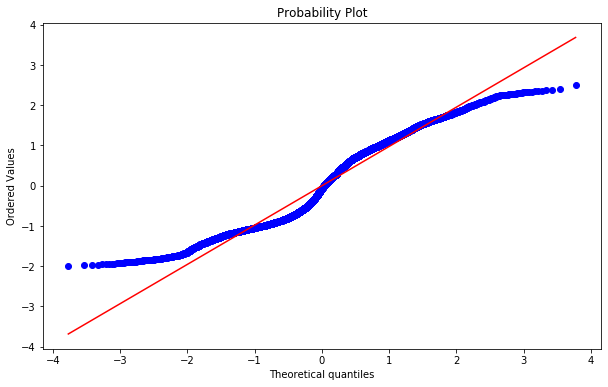

In [80]:
plt.figure(figsize=(10,6))
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()

In [81]:
# Test of Normality
# Shapiro Test

# Null Hypothesis      - the data is following the Guassian curve
# Alternate Hypothesis - the data is not following the Guassian curve

In [82]:
from scipy.stats import shapiro

In [83]:
stat = shapiro(st_residual)
stat

(0.9533302187919617, 1.401298464324817e-45)

In [84]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0  < 0.05. So Accepting the Null


In [85]:
# 3.) Multicollinearity
# There should be no multicollinearity in the data. 
# Multicollinearity occurs when the independent variables are too highly correlated with each other.

# Test of Multicollinearity
# Variance Inflation Factor

# VIF Value = 1       : No Correlation
# VIF Value < 5       : Moderate
# VIF Value > 5, < 10 : High
# VIF Value > 10      : Very High   should drop the variable

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
for i in range(0,len(X.columns)):
    print(traffic.columns[i] ,'\t', variance_inflation_factor(X.values,i))

holiday 	 1.0006264496696695
temp 	 1.0529550112943658
rain_1h 	 1.0487973101198413
snow_1h 	 nan
Year 	 nan
Month 	 1.0508321792174833
Day 	 1.0034083460803631
Hour 	 1.0164143704936606
weather_main 	 1.0465354447907165
weather_description 	 1.0353814714867833


In [88]:
# There is no Correlation between the features 
# all the VIF values are within 5 
# which indicates there is no multicollinearity

In [89]:
#Test of AutoCorrelation

from  statsmodels.stats.stattools import durbin_watson

In [90]:
stat =durbin_watson(residuals)
stat

0.24710323260735723

In [91]:
if stat != 2:
    print('The p value is',round(stat,4),' != 2. So Rejecting the Null')
else:
    print('The p value is',round(stat,4),' == 2. So Accepting the Null')

The p value is 0.2471  != 2. So Rejecting the Null


In [92]:
#There is positive correlation in the residuals

In [93]:
# 5.) Heteroscedasticity
# The residuals should be equal across the regression line

# Evaluation Plot
# Scale Location Plot - Used to evaluate Heteroscadaticity

# Test of Heteroscedasticity
# Goldfend Quandt test

#     Null Hypothesis      - the data is homoscedastic(uniform variance)
#     Alternate Hypothesis - the data is heteroscedastic(unequal variance)

In [94]:
stat = het_goldfeldquandt(Y,model.model.exog)
stat

(0.9764851368932214, 0.7817705165378971, 'increasing')

In [95]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.7818  > 0.05. So Rejecting the Null


In [96]:
# modelling linear regression

# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [97]:
traffic = pd.read_csv('traffic-Encoded.csv')

In [98]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,5,263.49,0.0,0,2013,1,1,0,1,2,1439
1,6,263.78,0.0,0,2013,1,1,1,1,22,1502
2,6,264.16,0.0,0,2013,1,1,2,7,10,933
3,6,263.95,0.0,0,2013,1,1,3,1,18,576
4,6,263.65,0.0,0,2013,1,1,4,1,18,372


In [99]:
X = traffic.drop('traffic_volume',axis=1)
Y = traffic['traffic_volume']

Train Test Split

In [100]:
from sklearn.model_selection import train_test_split

The test size is taken as 25%

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [102]:
#modelling linear regression

from sklearn.linear_model import LinearRegression

In [103]:
LR = LinearRegression()

In [109]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
pred = LR.predict(xtest)

Evaluation Metrics

In [106]:
import sklearn.metrics as metrics

In [107]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.14226682503077148


In [110]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  1666.6875948596871


In [111]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  3569809.847281104


In [112]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1889.3940423535541


In [ ]:
#Inference:
#By fitting all the features in the model we have got only 14% R squared.

#From the score we can get the inference 
#that only 14 percent of the variation 
#is reduced by including all the features in the model.

Forward Selection
Lets proceed with the forward selection to get which feature is more important for the traffic_volume Prediction
In each iteration, we add one more feature and find the score till an addition of a new variable does not improve the performance of the model.

Creating a GRID search to find the best single feature

In [113]:
for i in range(len(traffic.columns)-1):
    X=  traffic[[traffic.columns[i]]]
    Y=  traffic[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(traffic.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

holiday :  0.0
temp :  0.0265
rain_1h :  -0.0002
snow_1h :  -0.0002
Year :  -0.0002
Month :  -0.0009
Day :  -0.0001
Hour :  0.1271
weather_main :  0.001
weather_description :  0.0035


From the above R squared score only two feature temp and Hour is the only feature which has better score. so we add these two features as the base and proceed with other features.

In [114]:
for i in range(len(traffic.columns)-1):
    X=  traffic[['temp','Hour',traffic.columns[i]]]
    Y=  traffic[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(traffic.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1427
temp 0.1427
rain_1h 0.1422
snow_1h 0.1427
Year 0.1427
Month 0.1415
Day 0.1419
Hour 0.1427
weather_main 0.1425
weather_description 0.1446


The next highest score is for weather_description so we will include it in the next iteration

In [115]:
for i in range(len(traffic.columns)-1):
    X=  traffic[['temp','Hour','weather_description',traffic.columns[i]]]
    Y=  traffic[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(traffic.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1447
temp 0.1446
rain_1h 0.1442
snow_1h 0.1446
Year 0.1446
Month 0.1435
Day 0.1438
Hour 0.1446
weather_main 0.1445
weather_description 0.1446


The next highest score is for Holiday so we will include it in the next iteration

In [116]:
for i in range(len(traffic.columns)-1):
    X=  traffic[['temp','Hour','weather_description','holiday',traffic.columns[i]]]
    Y=  traffic[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(traffic.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1447
temp 0.1447
rain_1h 0.1443
snow_1h 0.1447
Year 0.1447
Month 0.1435
Day 0.1439
Hour 0.1447
weather_main 0.1445
weather_description 0.1447


Inference:
We have attained the R squared score of the base model which includes all the features.
So from this we can say that only 4 features are enough for the prediction.
These 4 features ['temp','Hour','weather_description','holiday'] have contributed the 100% for 14% variation of dependent variable

Polynomial Transformation
To understand the need for polynomial regression, we will see the scatter plot of the residuals

In [117]:
import matplotlib.pyplot as plt

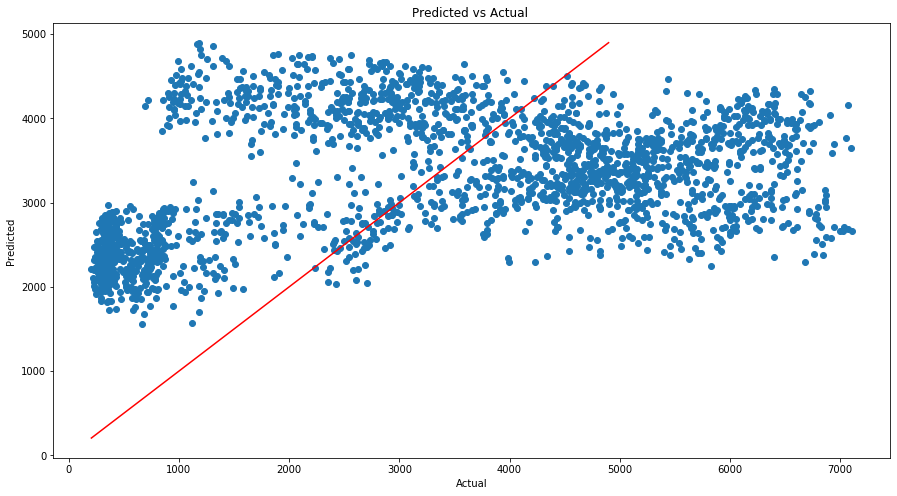

In [118]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting.

To overcome under-fitting, we need to increase the complexity of the model. To generate a higher order equation we can add powers of the original features as new features.the curve that we are fitting is quadratic in nature.

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
pf = PolynomialFeatures(degree=2)

In [121]:
traffic1 = traffic.copy()

In [122]:
X = traffic1.drop('traffic_volume',axis=1)
Y= traffic1['traffic_volume']

Transforming the data

In [123]:
X = pf.fit_transform(X)

In [124]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [125]:
LR = LinearRegression()

In [126]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
pred = LR.predict(xtest)

In [128]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.6579213370473369


In [129]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  930.0333124416977


In [130]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  1423701.2338912736


In [131]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1193.1895213633388


We can see now the R squared has increased and it is 65 percent which indicates that 65 percent of variation is reduced after transforming the data to polynomial regression

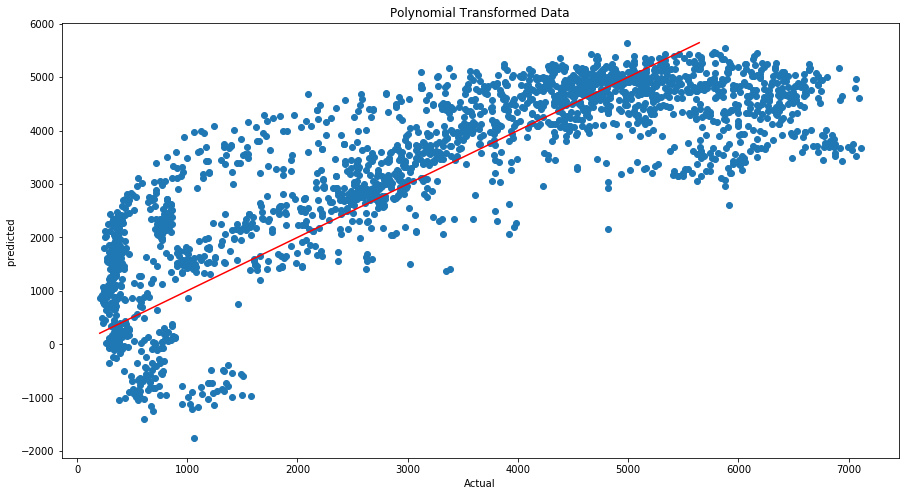

In [132]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Polynomial Transformed Data')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()

we can see that still the line is not a best fit but it is more better than the original data. Transformed data has given a better performance than the original one.